<a href="https://colab.research.google.com/github/hellooishik/About/blob/main/COM_759.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this analysis, I worked with an obesity-related dataset, performing data cleaning, transformation, exploratory analysis, visualization, and statistical interpretation.

1. **Data Cleaning and Transformation**: I removed duplicate entries, encoded categorical variables, and standardized numerical columns to prepare for analysis.

2. **Exploratory Data Analysis (EDA)**: I examined summary statistics and visualized distributions and relationships (e.g., age distribution, weight by gender) to understand data structure.

3. **Data Visualization**: I used correlation heatmaps and scatter plots to highlight key relationships, such as between height, weight, and activity levels.

4. **Statistical Analysis**: I conducted correlation analysis and a linear regression model to examine the impact of variables like age, height, and physical activity on weight, which provided predictive insights into obesity factors.

Overall, this approach highlighted significant patterns and potential predictors related to obesity in the dataset.

In [ ]:
import pandas as pd

Upload the dataset file (Obesity.csv) to the Colab environment and load it as a pandas DataFrame.

Foe the Next Step I'm Uplaoding My Dataset from github


In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/hellooishik/COM756DATASET/refs/heads/main/Obesity.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Step 2 : Data Cleaning

Checking for Missing Values and Duplicates

In [ ]:
# missing values
print("Missing values:\n", data.isnull().sum())

# duplicates
print("Duplicates:", data.duplicated().sum())


Missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Duplicates: 24


# Removing The Duplicates

In [ ]:

data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)


Shape after removing duplicates: (2087, 17)


# Step 3: Data Transformation

Encoding Categorical Variables (Process Code : 114- 252- 458)

 I'm using LabelEncoder for categorical columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

Scale Numerical Columns (Process Code : 114- 425- 744)

Standardize the numerical columns to prepare for analysis.

**I'm Using StandardScaler Lib for this Operation**

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 4: Exploratory Data Analysis (EDA)

Fetching Summary Statistics and displaying

In [ ]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2087.000000,2087.000000,2.087000e+03,2.087000e+03,2087.000000,2087.000000,2.087000e+03,2087.000000,2.087000e+03,2.087000e+03,2087.000000,2087.000000,2087.000000
mean,0.504073,-1.634214e-16,8.851994e-16,-5.447381e-17,0.825108,0.883565,-5.447381e-16,1.736353e-16,1.853857,0.021083,4.085536e-16,0.045999,2.587506e-16,-1.089476e-16,2.270244,2.358888,3.014375
std,0.500103,1.000240e+00,1.000240e+00,1.000240e+00,0.379966,0.320823,1.000240e+00,1.000240e+00,0.459494,0.143695,1.000240e+00,0.209533,1.000240e+00,1.000240e+00,0.517008,1.265402,1.948470
min,0.000000,-1.625984e+00,-2.712155e+00,-1.827745e+00,0.000000,0.000000,-2.658892e+00,-2.225418e+00,0.000000,0.000000,-1.652172e+00,0.000000,-1.186977e+00,-1.090505e+00,0.000000,0.000000,0.000000
25%,0.000000,-6.968683e-01,-7.781538e-01,-7.966038e-01,1.000000,1.000000,-7.883642e-01,-4.856048e-03,2.000000,0.000000,-6.804829e-01,0.000000,-1.041062e+00,-1.090505e+00,2.000000,3.000000,1.000000
50%,1.000000,-2.364389e-01,-1.170116e-02,-1.435055e-01,1.000000,1.000000,-4.713949e-02,3.909061e-01,2.000000,0.000000,-7.809793e-03,0.000000,-1.501506e-02,-5.290961e-02,2.000000,3.000000,3.000000
75%,1.000000,2.586523e-01,7.172047e-01,8.080017e-01,1.000000,1.000000,1.082164e+00,3.909061e-01,2.000000,0.000000,7.587794e-01,0.000000,7.796945e-01,5.542111e-01,3.000000,3.000000,5.000000
max,1.000000,5.755509e+00,2.976762e+00,3.289772e+00,1.000000,1.000000,1.082164e+00,1.699068e+00,3.000000,1.000000,1.636552e+00,1.000000,2.328908e+00,2.198928e+00,3.000000,4.000000,6.000000


Visualizations: Use some plots to understand distributions and relationships in the data

***I'm using matplotlib and seaborn lib***

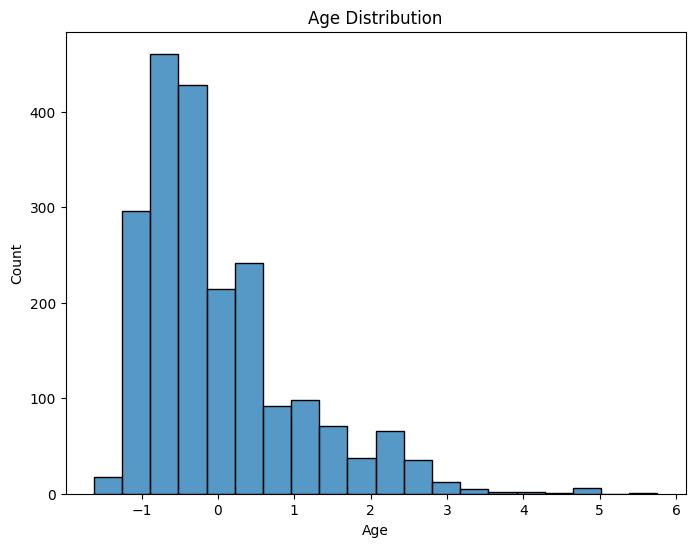

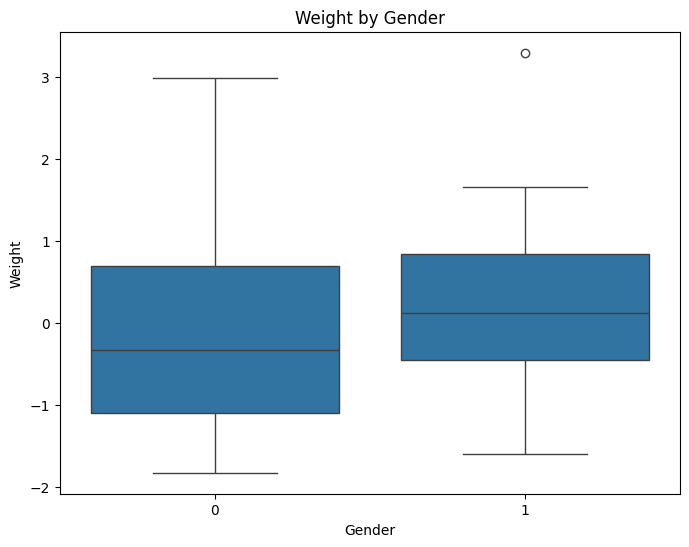

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

# Boxplot for Weight by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Weight', data=data)
plt.title('Weight by Gender')
plt.show()


# Step 5: Data Visualization

Creating visualizations to showcase important findings (Process Code : 114-885-4007)

**Displaying the Correlation Heatmap **

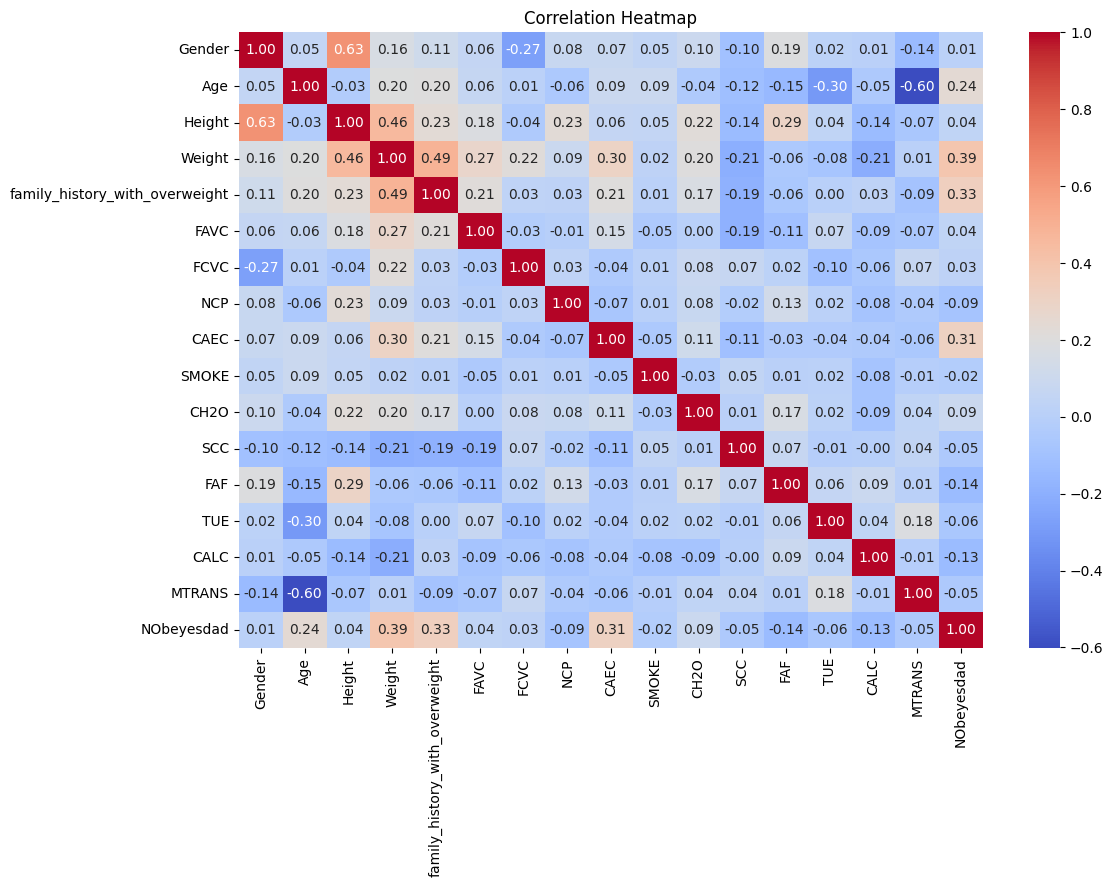

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Displaying Scatter Plot of Height vs Weight**

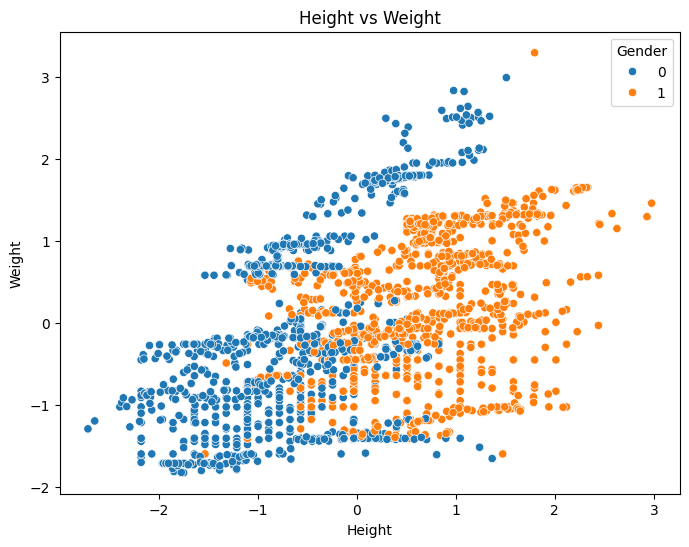

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=data)
plt.title('Height vs Weight')
plt.show()


# Step 6: Statistical Analysis

**the Correlation Analysis plot **

In [ ]:

correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                   Gender       Age    Height    Weight  \
Gender                          1.000000  0.050641  0.626748  0.163176   
Age                             0.050641  1.000000 -0.031748  0.198160   
Height                          0.626748 -0.031748  1.000000  0.457468   
Weight                          0.163176  0.198160  0.457468  1.000000   
family_history_with_overweight  0.113492  0.200379  0.232258  0.492969   
FAVC                            0.061220  0.063895  0.180694  0.274655   
FCVC                           -0.271575  0.013572 -0.040363  0.216574   
NCP                             0.077863 -0.055823  0.227806  0.092149   
CAEC                            0.074564  0.092097  0.058001  0.300271   
SMOKE                           0.045501  0.091261  0.054326  0.024369   
CH2O                            0.095129 -0.044058  0.220487  0.203823   
SCC                            -0.102435 -0.117959 -0.137078 -0.205409   
FAF              

# Regression Analysis

***Performing regression if relevant, such as predicting weight from other variables.***

**Using LinearRegression Lib for Processing**

In [ ]:
from sklearn.linear_model import LinearRegression

# Example regression to predict Weight based on Age, Height, and other features
X = data[['Age', 'Height', 'FAF', 'FCVC']]  # predictor variables
y = data['Weight']  # target variable

model = LinearRegression()
model.fit(X, y)

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Regression Coefficients: [ 0.18356939  0.52867981 -0.18976858  0.23959739]
Intercept: -3.1284112443249032e-16
